<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/1_Introduccion/rls.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Regresión Lineal Simple

La RLS, es la aproximación más simple al aprendizaje supervisado. En particular, la regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. 

Es un método que tiene muchos años y está presente en toda la bibliografía.

Aunque parezca super simple comparado con las técnicas modernas de machine learning, la regresión lineal aún es un método útil y ampliamente usado. 

Principalmente, sirve como un buen punto de partida para aproximaciones más nuevas: muchas de las técnicas **fancy** pueden interpretarse como generalizaciones o extensiones de la regresión lineal. 

Por lo tanto es súper importante tener una buena compresión de la regresión lineal antes de estudiar los algoritmos más complejos de machine learning. 


## Dataset Advertising

Supongamos que que somos consultores estadísticos, y nos contratan con el objetivo de aumentar las ventas de un determinado producto. 
El dataset Advertising consiste en las ventas del producto en 200 mercados, y el presupuesto dedicado en publicidad en 3 medios: TV, radio y diario.

Si logramos identificar una relación entre la inversión en publicidad y las ventas, podremos recomendarle a nuestro cliente hacia dónde debe dirigir su inversión en publicidad.

La variables predictoras serán los presupuestos para cada canal y la variable de respuesta será las ventas.

<u>Exploremos un poco los datos:</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Veamos la relación entre las ventas y la publicidad en cada uno de los medios

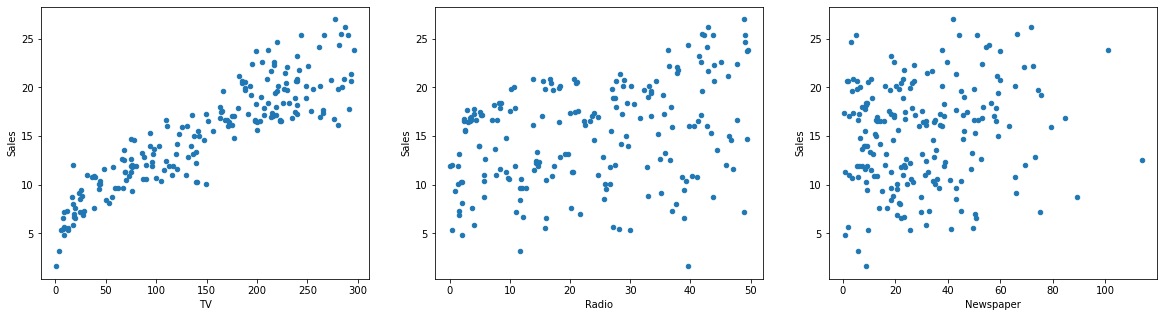

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
df.plot.scatter(x='TV', y='Sales', ax=ax1)
df.plot.scatter(x='Radio', y='Sales', ax=ax2)
df.plot.scatter(x='Newspaper', y='Sales', ax=ax3);

Pensemos en estos datos. Algunas preguntas que podrían surgir:
<ul>
<li>¿Hay alguna relación entre el presupuesto en publicidad y las ventas?</li>
<li>¿Qué tan fuerte es esa relación?</li>
<li>¿Cuáles de los medios mencionados contribuyen a las ventas?</li>
<li>¿Con cuánta precisión podemos predecir las ventas futuras?</li>
<li>¿Es esta relación lineal?</li>
</ul>

Resulta que la regresión lineal puede ser usada para responder cada una de estas preguntas y algunas más. 
Veamos algunos conceptos y luego intentaremos responderlas.

La regresión lineal simple intenta predecir una respuesta cuantitativa Y en base a una única variable predictora X. 
Asume que hay aproximadamente una relación lineal entre X e Y. 

Matemáticamente:  $$ Sales  \approx \hat {\beta}_{0} +  \hat {\beta}_{1} TV $$

𝛽0 y 𝛽1 son dos constantes que representan el intercepto y la pendiente en el modelo lineal. 

Juntos, 𝛽0 y 𝛽1 son conocidos como los **parámetros del modelo**. 

Una vez que hemos usado nuestro set de entrenamiento para producir los estimadores     y    para los coeficientes del modelo, podemos predecir futuras ventas en base a un valor particular de TV.

## ¿Cómo calculamos los parámetros del modelo?

Vamos a elegir el par 𝛽0 y 𝛽1 tales que minimizan la distancia entre la línea recta y los verdaderos valores que observamos:

<img src="https://i.ibb.co/8c2zbDy/mco.png" alt="Girl in a jacket" width="80%">

Ahora con Python:


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
#Mi modelo será una instancia de la clase LinearRegression (¡Recuerden Programación Orientada a Objetos!)
model = LinearRegression(fit_intercept=True)

In [7]:
# Definimos la "X" y la "y" con las que vamos a entrenar nuestro modelo 
X = df.loc[:,['TV']]
y = df['Sales']

Noten que alrededor de tv hay dos corchetes, mientras que alrededor de Sales hay uno sólo. 

Miren lo siguiente:

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
X.shape

(200, 1)

In [11]:
y.shape

(200,)

En scikit learn las variables explicativas se expresan en un DataFrame y la variable explicada es siempre una serie. 

In [12]:
#Los coeficientes (Betas) del modelo todavía no están definidos
model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [13]:
# Usamos el método fit para entrenar el modelo

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_

array([0.05546477])

In [16]:
model.intercept_

6.974821488229891

<strong> ¿Cómo interpretamos estos coeficientes? </strong>

$ \hat {\beta}_{0} = 6.9748214882298925 $

Este coeficiente indica que cuando la publicidad en TV es de 0, de todas maneras las ventas son de 6.97 unidades.

$ \hat {\beta}_{1} = 0.05546477 $

Este coeficiente indica que cuando agregamos 1 unidad de publicidad en TV, las ventas aumentan en 0.05 unidades.


## Ejercicio

¿Cuántas ventas esperaríamos con una inversión en televisión de 4 unidades?

# Precisión de los coeficientes estimados

La matemática que soporta la regresión lineal simple, se basa en suponer que la variable explicativa (X) y la explicada (y) guardan una relación lineal perfecta perturbada por **ruido aleatoreo**: fenómenos que no podemos o no queremos explicar dentro del modelo y que no dependen de X.

Los fenómenos del mundo real nunca son exactamente así, pero vamos a encontrar que esta simplificación es útil en muchos casos para, por ejemplo, estudiar la relación entre X e y. 

Lo bueno de Python es que podemos simular datos que sí cumplen estrictamente este supuesto de linealidad + ruido aleatoreo y observar qué pasa con las derviaciones estadísticas. 

Supongamos que el precio de los departamentos de una ciudad es de 10000usd de base + usd2000/m2 más una perturbación aleatoria. Nuestra ciudad está compuesta por 1000 departamentos. 

Vamos a simular esa población:

In [19]:
# Las superficies de los departamentos se distribuyen normalmente y 
# tienen una media de 100 mts2 con un desvío estándar de 20mts2
superficies = np.random.normal(loc=100, scale=20, size=1000).astype(int)
print(superficies[0:30])

[105  88 125 118  82  93  74 100  93  88  80  93  86 118  72 100  87  97
 115 110 147 111  64 105  55 107 105  90  99  87]


In [20]:
# Los errores aleatorios tienen un promedio de $0 y un desvío estándar de usd3000
errores = np.random.normal(loc=0, scale=80000, size=1000).astype(int)
print(errores[0:30])

[ -58834   53157  -24508  -39528   46024 -107829 -133710  -35716   61181
 -113296   48593   -4342  -62496  -11345  -33901  -79241   25659   95611
  107103   76591   40854  148714  -98784  -58569  -93924   18288   29470
  143169    3253  -91451]


In [21]:
# Generamos nuestra "población" de 1000 departamentos
precios_departamentos = (superficies * 2000 + 10000 + errores).astype(int)
print(precios_departamentos[0:30])

[161166 239157 235492 206472 220024  88171  24290 174284 257181  72704
 218593 191658 119504 234655 120099 130759 209659 299611 347103 306591
 344854 380714  39216 161431  26076 242288 249470 333169 211253  92549]


Ahora supongamos que somos un grupo de relevadoras de precios y esa población es completamente desconocida para nosotras. Tenemos la posiblidad de tocar el timbre a algunos vecinos de la ciudad y preguntarles cuánto pagaron por su casa, pero esto nos cuesta tiempo y esfuerzo. 

Nos preguntamos entonces:



* Dada una casa de 100mts2 ¿Cuál es su precio? ¿Cuánta confianza puedo tener en ese valor? ¿Y dada una casa de 500mts2?
* ¿Puedo afirmar con X% de confianza, que a mayor número de mts2 mayor precio?
* ¿Cuántas casas tenemos que conocer para poder estimar los precios con un X% de confianza?
* ¿Cuántas casas tenemos que conocer para entender cuánto influyen los mts2 en el precio con un X% de confianza?

Todas estas preguntas se pueden responder si suponemos que en nuestra población se cumplen los supuestos de la regresión lineal (vamos a entrar en detalle en la próxima clase) y aplicamos técnicas estadísticas. 

## 1. La confianza en las predicciones

¿Qué pasa si tomamos una muestra de 30 departamentos? ¿Cómo se vería nuestra regresión?

In [22]:
df_poblacion = pd.DataFrame({'superficies':superficies,'precios':precios_departamentos})

df_muestra = df_poblacion.sample(30)

In [23]:
model.fit(df_muestra[['superficies']],df_muestra['precios'])

LinearRegression()

In [24]:
coeficiente = model.coef_
print(coeficiente)

[2007.41983563]


In [25]:
f'Según el modelo que podemos construir con esta muestra, por cada mts2 de superficie, el precio aumenta ${coeficiente[0]}'

'Según el modelo que podemos construir con esta muestra, por cada mts2 de superficie, el precio aumenta $2007.419835631704'

¿Qué pasa si tomamos otra muestra?

In [31]:
df_muestra = df_poblacion.sample(30)
model.fit(df_muestra[['superficies']],df_muestra['precios'])
print(model.coef_)

[3332.33534397]


Ahora tomemos 100 muestras y vamos a graficarlas. También veamos en rojo la verdadera función generadora de los datos: 

precio_venta = 10000 + 2000 * superficia

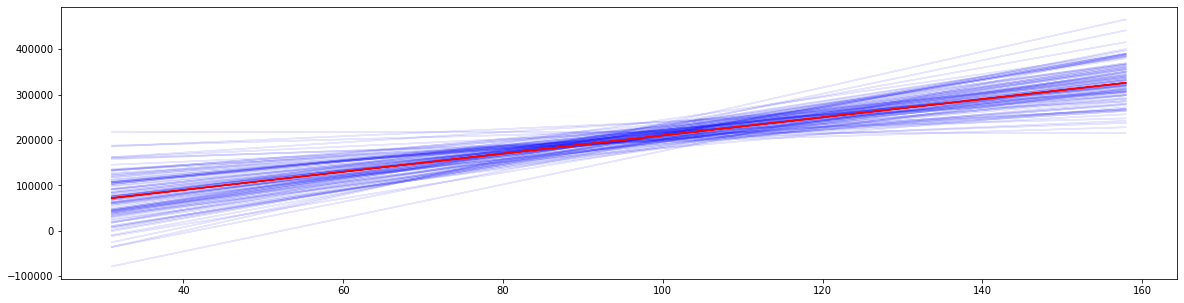

In [32]:
for i in range(100):
    # Tomamos una muesta de 30 departamentos
    df_muestra = df_poblacion.sample(30)
    # Entrenamos el modelo sobre la muestra
    model.fit(df_muestra[['superficies']],df_muestra['precios'])
    # Utilizamos al modelo para predecir los valores de todos los departamentos
    predicciones = model.predict(df_poblacion[['superficies']])
    # Graficamos cada una de las 100 regresiones
    plt.plot(df_poblacion['superficies'],predicciones,color='blue',alpha=0.1)

proceso_generador_perfecto = 10000 + df_poblacion['superficies'] * 2000
plt.plot(df_poblacion['superficies'],proceso_generador_perfecto,color='red')
plt.show()

Todas las regresiones son distintas, pero las predicciones se parecen mucho más alrededor de 100 que en los extremos ¿Recuerdan cuál era la superficie promedio de los departamentos en nuestra ciudad? 


### Conclusión 1

Las predicciones son más precisas cerca del centroide de los datos que en los extremos. En otras palabras, nuestro modelo conoce bien lo que vio y más allá de eso, sólo puede hacer extrapolaciones cada vez más imprecisas.

¿Qué pasa si en lugar de 30, tomamos muestras más grandes? Es decir, aunque cueste más esfuerzo hacemos un relevamiento más exahustivo...

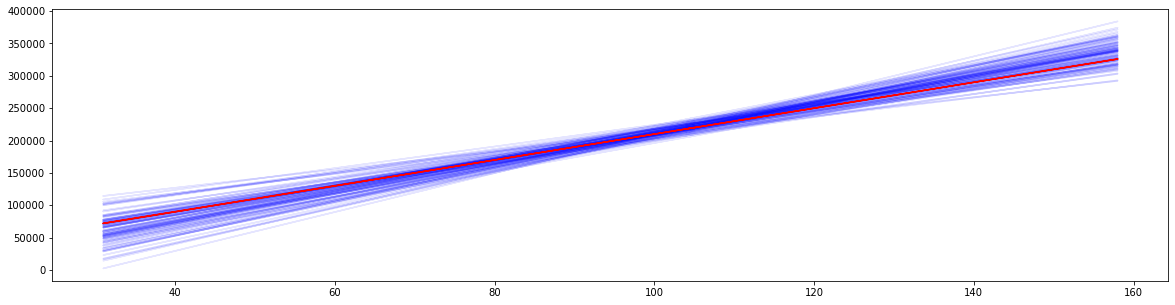

In [33]:
for i in range(100):
    # Ahora tomamos una muesta de 150 departamentos
    df_muestra = df_poblacion.sample(150)
    # Entrenamos el modelo sobre la muestra
    model.fit(df_muestra[['superficies']],df_muestra['precios'])
    # Utilizamos al modelo para predecir los valores de todos los departamentos
    predicciones = model.predict(df_poblacion[['superficies']])
    # Graficamos cada una de las 100 regresiones
    plt.plot(df_poblacion['superficies'],predicciones,color='blue',alpha=0.1)

proceso_generador_perfecto = 10000 + df_poblacion['superficies'] * 2000
plt.plot(df_poblacion['superficies'],proceso_generador_perfecto,color='red')
plt.show()

### Conclusión 2
Si tomamos muestras más grandes, las regresiones son todas más parecidas entre sí.

La interpretación estadística de esta incerteza en las predicciones, está dada por los intervalos de confianza. 
Algunas librerías de Python permiten calcular los intervalos de confianza de un modelo. No es el caso de scikit learn porque esta librería está pensada para machine learning en general, no sólo para regresiones y busca crear una interfaz común para todos los modelos. 

Para acceder a estimaciones estadísticas como los intervalos de confianza, en el próximo encuentro vamos a utilizar statsmodel.